In [5]:
#Loading library dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [6]:
#loading the dataset as pandas dataframe
df=pd.read_csv('/content/creditcard.csv')

In [7]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.info()
#time in sec
# This dataset is already a PCA reduced dataset with V1 to V28 are PCs
# The only non PCA applied columns are Time and Amount
# Time indicates the time lapsed between transactions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#class 0-legit,class1-fraud,lets see the proportion
df['Class'].value_counts()
#Class imbalance seen

0    284315
1       492
Name: Class, dtype: int64

In [10]:
df.shape

(284807, 31)

In [11]:
#checking missing values in the dataframe
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# SUMMARISING THE non transformed column

df['Amount'].describe()

# The smallest transaction amount is 0 and highest is 25691

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<Axes: xlabel='Class', ylabel='Amount'>

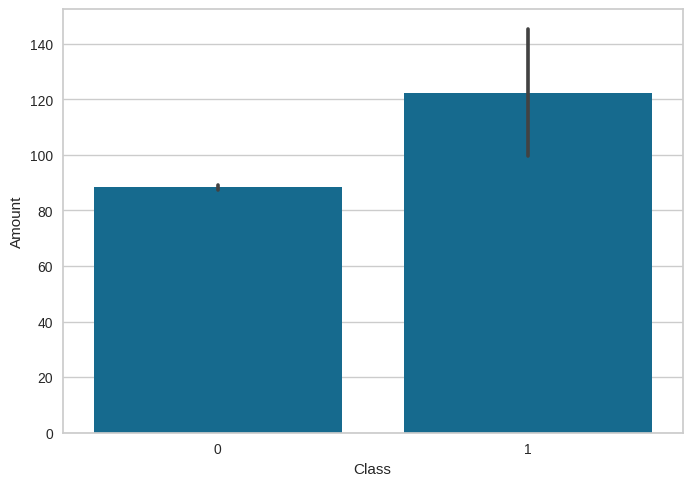

In [13]:
sns.barplot(x='Class',y='Amount',data=df)

<Axes: xlabel='Class', ylabel='Time'>

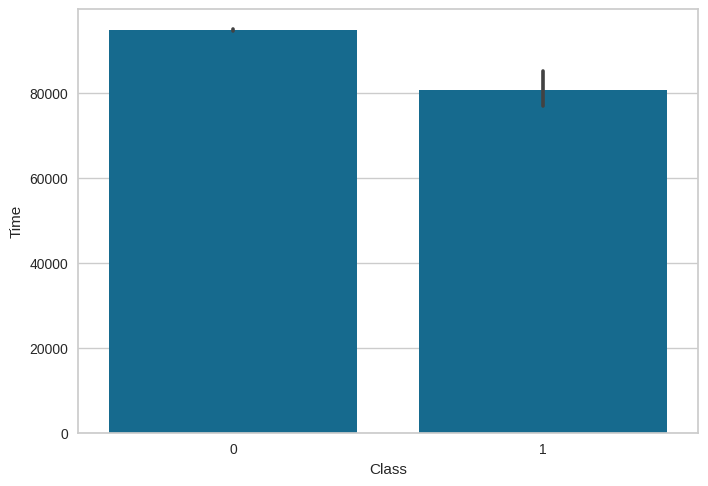

In [14]:
sns.barplot(x='Class',y='Time',data=df)

In [15]:
#DATA CLEANING
# NULL VALUES DETECTION AND HANDLING

# A new way to check for any null values at all in data. Returns a boolean index

df.isnull().values.any()

False

In [16]:
#DATA DUPLICATION
df.duplicated().any()


True

In [17]:
df.duplicated().sum()

1081

In [18]:
df = df.drop_duplicates(keep = 'first')

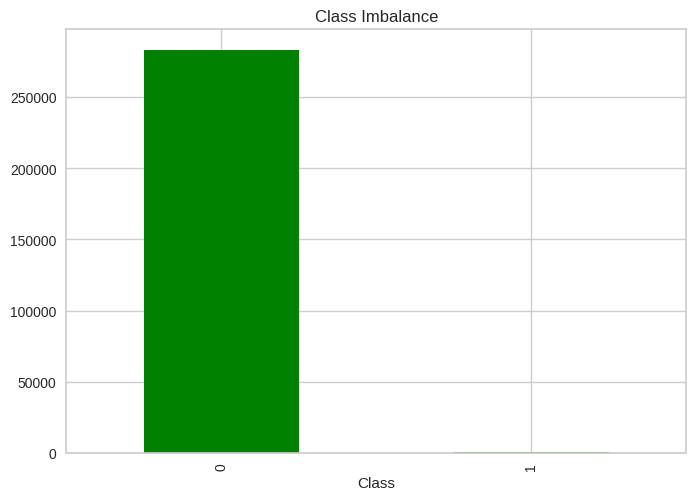

In [19]:
# CLASS IMBALNCE CHECK
df.groupby('Class').size().plot(kind = 'bar', color = 'green')
plt.title("Class Imbalance")
plt.show()

In [20]:
print(f'Percent of Not Fraudulent transactions = {round(len(df[df["Class"]== 0])/len(df["Class"]),4)*100}')
print(f'Percent of Fradulent transactions = {round(len(df[df["Class"]== 1])/len(df["Class"]),4)*100}')

Percent of Not Fraudulent transactions = 99.83
Percent of Fradulent transactions = 0.16999999999999998


In [21]:
# TIME DISTRIBUTION OF FRAUDULENT PLOTS

#The fraudulent transaction have happened throughout and not stuck to a time frame

In [22]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]


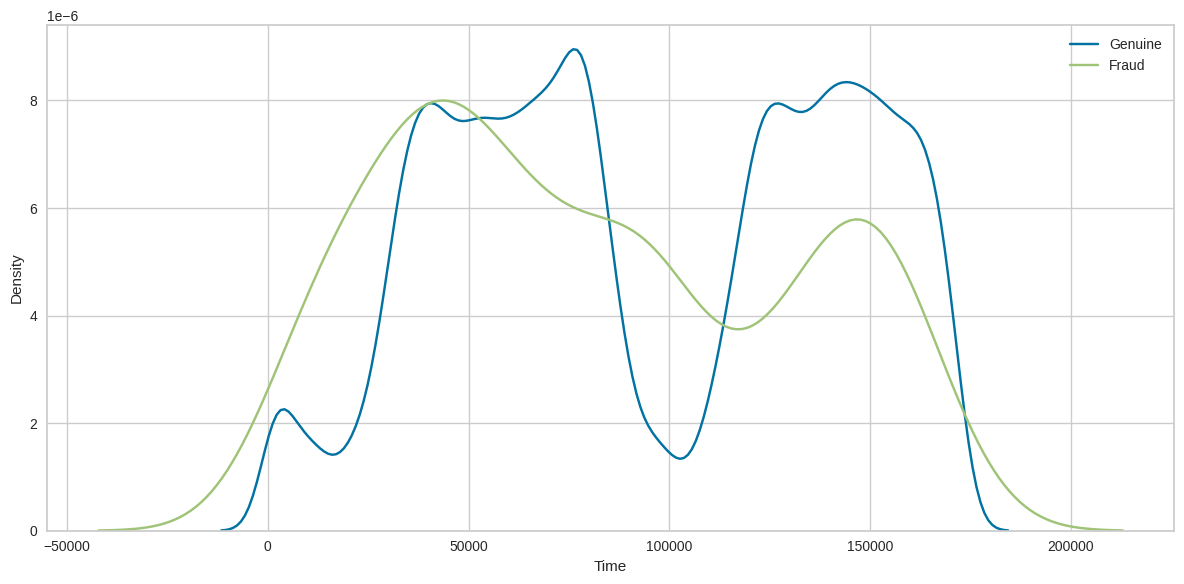

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(class_0, ax = ax)
sns.kdeplot(class_1, ax = ax)
ax.legend(['Genuine', 'Fraud'])
plt.tight_layout()
plt.show()

In [24]:
# IN DEPTH TIME DISTRIBUTION OF CLASSES

# Creating hourly distribution of transactions from the time column in seconds


df['hour'] = df['Time'].apply(lambda x : np.floor(x/3600))

In [25]:
agg = df.groupby(['hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()


In [26]:
agg.head()

,hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


In [27]:
# HOURLY DISTRIBUTION OF CLASSES

# TOTAL AMOUNT


# Fradulent transactions have happened all the hours
# Most of genuine transactions account occured between 10-20 hour time frame with lower transactions at night
# and followed the same pattern next day

In [28]:
# FEATURE SCALING

# All the data were already scaled before PCA on all the features columns, the non scaled components are Amount and class
# Scaling the non scaled features first before addressing class imbalance problem


from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

sc = StandardScaler()
rc = RobustScaler()

df['scaled_amount'] = rc.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rc.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


# Amount and Time values are now scaled and are labelled as scaled_time and scaled_amount

In [29]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,hour,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0,0.667362,-0.995267


In [30]:
# Rearranging the scaled time and amount columns to be the first in the dataframe

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df = df.drop(['scaled_amount', 'scaled_time'], axis=1)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,hour
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0


In [31]:
# SPLITTING DATA INTO TEST AND TRAIN

# Splitting the original dataset before undersampling so that we test the trained model on the original test data rather
# than undersampled data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold


# Dropping the target for X
X = df.drop('Class', axis=1)

# Keeping the target in y
y = df['Class']

# Doing a stratified Split

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]


In [32]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [33]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99833466 0.00166534]
[0.99832584 0.00167416]


In [34]:
# UNDERSAMPLING FOR IMBALANCED CLASSES

# Using undersampling so that the genuine transactions are reduced to the same number as fradulent ones

df1 = df.sample(frac = 1)

# Number of fraud rows in data is 492
fraud_df = df.loc[df['Class'] == 1]
genuine_df = df.loc[df['Class'] == 0][:473]

In [35]:
# Balanced class dataframe

balanced_df = pd.concat([fraud_df, genuine_df])

In [36]:
# To shuffle the new dataframe


df3 = balanced_df.sample(frac=1, random_state=34)

df3

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,hour
145,-0.084967,-0.994221,-1.822273,1.235336,-0.307804,-1.821824,2.762482,3.641499,-0.344614,-1.547541,...,2.080848,-1.591888,0.321636,0.889258,0.156445,-0.960611,-0.035302,0.182321,0,0.0
220,-0.222500,-0.993586,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,0,0.0
89190,19.192880,-0.261190,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1,17.0
42007,-0.295369,-0.514430,-3.140260,3.367342,-2.778931,3.859701,-1.159518,-0.721552,-4.195342,-0.598346,...,2.452339,-0.292963,-0.189330,-0.166482,0.038040,-0.015477,0.776691,0.397557,1,11.0
42009,1.256154,-0.514418,-2.740483,3.658095,-4.110636,5.340242,-2.666775,-0.092782,-4.388699,-0.280133,...,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.319844,-0.992834,1.228501,0.091870,-0.268385,0.748905,0.449027,0.453604,-0.013060,0.098526,...,-0.098694,-0.410240,-0.271817,-1.419977,0.701940,-0.335895,0.003435,0.003994,0,0.0
407,0.709220,-0.991835,-1.097477,1.246236,0.464855,-0.178196,0.249499,-0.725058,1.197760,-0.358585,...,-0.050148,0.114628,-0.188974,-0.066727,-0.160964,0.275263,0.117647,0.272015,0,0.0
17,-0.293561,-0.995138,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0,0.0
42769,1.339174,-0.510681,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,...,2.479414,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,1,11.0


In [37]:
# CHECKING IF CLASS IMBALANCE HAS BEEN RECTIFIED

class_balance = pd.DataFrame(df3["Class"].value_counts()/len(df3))
class_balance


,Class
0,0.5
1,0.5


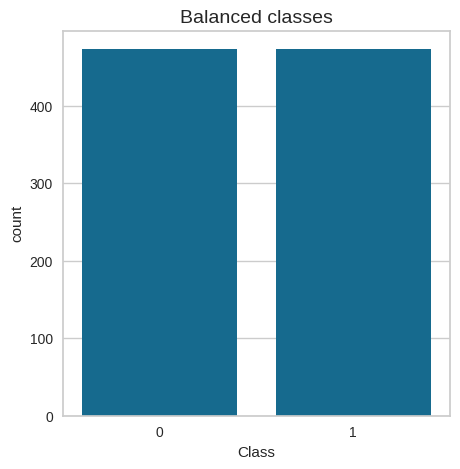

In [38]:
plt.figure(figsize = (5,5))
sns.countplot(x ='Class', data= df3)
plt.title('Balanced classes', fontsize=14)
plt.show()


In [39]:
# # INSIGHTS INTO NEXT STEPS
# The wider the gap between the training score and the cross validation score,
# the more likely your model is overfitting (high variance).
# If the score is low in both training and cross-validation sets this is an indication
# that our model is underfitting (high bias)
# Logistic Regression Classifier shows the best score in both training and cross-validating sets.

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [41]:
# Turn the values into an array for feeding the classification algorithms.

X_train #= X_train.values
X_test #= X_test.values
y_train #= y_train.values
y_test #= y_test.values

124406    0
223455    0
210612    0
140809    0
145667    0
         ..
183490    0
271656    0
219194    0
230454    0
156199    0
Name: Class, Length: 56746, dtype: int64

In [44]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()}

In [45]:
X_train

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,hour
203196,2.735642,0.587761,1.515582,-1.272069,-0.270017,0.448209,-1.061057,0.260773,-0.792547,0.280473,...,0.174504,0.239680,0.267779,0.125625,0.727591,-0.525146,-0.483771,0.001232,0.005579,37.0
91489,5.451259,-0.249168,-1.216085,-1.506489,1.304622,-2.207052,-1.389462,0.306704,1.545456,-0.321998,...,0.659647,0.137003,0.270698,0.590775,0.190723,0.730081,-0.191268,-0.259513,-0.151682,17.0
140705,-0.242386,-0.009548,-1.054844,1.707235,1.681576,2.202332,0.087516,-0.321509,0.554001,0.100575,...,0.131801,-0.055906,-0.088237,-0.165253,0.400363,0.407291,0.027197,-0.311371,-0.244379,23.0
195530,-0.153247,0.545372,-1.252828,1.551425,0.071788,-0.835508,0.816242,-0.220355,1.051681,-1.463360,...,0.189711,0.511366,-0.469981,0.162699,-0.395239,-0.928573,0.055954,-0.347438,-0.021231,36.0
78724,-0.167014,-0.317587,0.942205,-0.186807,1.315412,1.199749,-0.279417,1.656796,-0.844616,0.631952,...,-0.240246,0.086440,0.635071,0.154938,-0.621172,0.077365,-0.302469,0.148418,0.028231,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108006,25.920317,-0.164308,-5.255628,-7.559348,0.084658,0.715231,-3.920487,3.015778,4.383483,0.334820,...,4.482722,1.348808,0.378762,4.759899,-0.394886,0.186761,1.179641,-0.613773,0.297032,19.0
94952,-0.083577,-0.230200,1.413927,-0.816052,0.927023,-0.851845,-1.298453,0.049349,-1.347456,0.108911,...,0.134757,0.370579,1.023204,-0.208356,-0.569446,0.443527,0.019381,0.054880,0.023638,18.0
115605,2.975664,-0.126467,-1.788205,-1.388067,-0.211401,0.976221,0.302770,-0.122843,-0.002705,0.498810,...,0.528712,-0.002598,-0.253128,0.478697,-0.798614,-0.393766,-0.199126,0.327798,-0.027179,20.0
129875,-0.292032,-0.064183,1.202775,-0.486875,0.856738,-0.762854,-1.134141,-0.384524,-0.734589,0.175876,...,-0.237044,0.001020,0.227059,0.008766,0.064088,0.385346,-0.652726,0.102017,0.029219,22.0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [46]:
# BUILDING SIMPLE CLASSIFIER MODELS

classi_models = {"LogisiticRegression": LogisticRegression(), "KNearest": KNeighborsClassifier(),
                "Support Vector Classifier": SVC(),"DecisionTreeClassifier": DecisionTreeClassifier() }



In [48]:
!pip install pycaret
from pycaret.classification import *

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
s = setup(df3, target = 'Class')

,Description,Value
0,Session id,2665
1,Target,Class
2,Target type,Binary
3,Original data shape,"(946, 32)"
4,Transformed data shape,"(946, 32)"
5,Transformed train set shape,"(662, 32)"
6,Transformed test set shape,"(284, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [51]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0230
ada,Ada Boost Classifier,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0240
gbc,Gradient Boosting Classifier,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.1660
xgboost,Extreme Gradient Boosting,0.9985,0.9985,0.9970,1.0000,0.9985,0.9970,0.9970,0.0560
lr,Logistic Regression,0.9970,0.9996,0.9970,0.9971,0.9970,0.9939,0.9940,0.6530
rf,Random Forest Classifier,0.9970,0.9999,0.9939,1.0000,0.9969,0.9939,0.9940,0.1650
et,Extra Trees Classifier,0.9970,0.9999,0.9970,0.9970,0.9970,0.9939,0.9939,0.1740
lightgbm,Light Gradient Boosting Machine,0.9970,0.9989,0.9970,0.9971,0.9970,0.9939,0.9940,0.2820
knn,K Neighbors Classifier,0.9955,0.9984,0.9910,1.0000,0.9954,0.9910,0.9911,0.0300
svm,SVM - Linear Kernel,0.9955,0.0000,0.9970,0.9940,0.9955,0.9910,0.9910,0.0200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Logistic regression itself has the best accuracty on the pycaret analysis

In [52]:
lo_model = LogisticRegression()
lo_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lo_pred = lo_model.predict(X_test)

In [54]:
lo_pred2 = lo_model.predict(original_Xtest)

In [55]:
from sklearn.metrics import *


accuracy_score(y_test,lo_pred)

0.9992598597257957

In [56]:
cm = confusion_matrix(y_test,lo_pred)

In [57]:
cm

array([[56646,    16],
       [   26,    58]])

In [58]:
# PLOTTING CONFUSION MATRIX

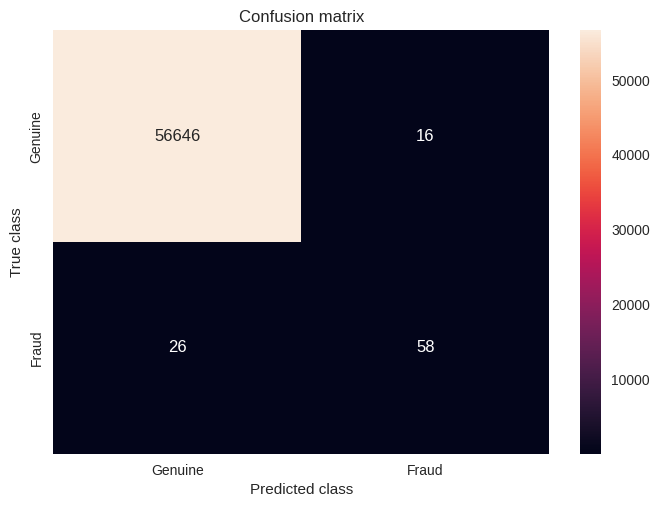

In [59]:
LABELS = ['Genuine', 'Fraud']

sns.heatmap(cm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()